In [46]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load
data = load_breast_cancer()

# Convert to DataFrame
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Check
print(df.head())
print(df['target'].value_counts())  # see class distribution

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

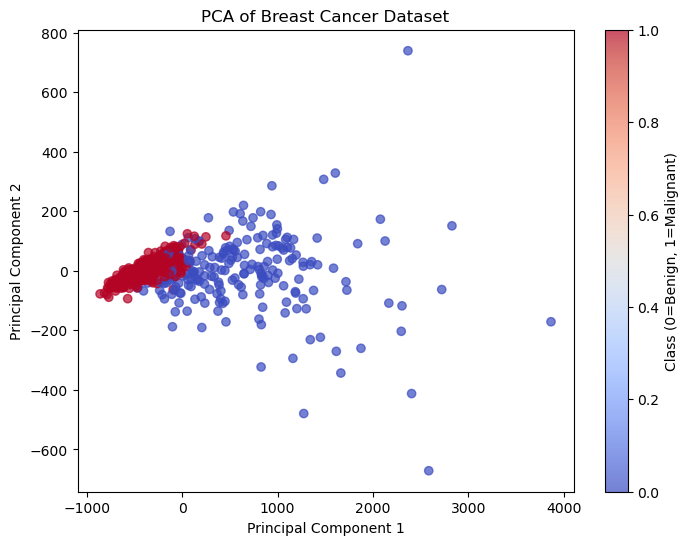

In [47]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Breast Cancer Dataset")
plt.colorbar(label='Class (0=Benign, 1=Malignant)')
plt.show()


In [48]:
# Example: apply PCA, then fit a classifier
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Then fit models (e.g. LogisticRegression, SVM) on X_train_pca

In [53]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1️⃣ Fit PCA
pca = PCA(n_components=2)  # or n_components that explains ~95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 2️⃣ Fit Linear Regression on PCA data
linreg = LinearRegression()
linreg.fit(X_train_pca, y_train)

# 3️⃣ Predict
y_pred = linreg.predict(X_test_pca)

# 4️⃣ Evaluate
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")


Mean Squared Error: 0.0935
R² Score: 0.6021


Polynomial Regression (deg 2) MSE: 28.1331
Polynomial Regression (deg 2) R^2: -118.7567


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Fit
logr = LogisticRegression(max_iter=10000)
logr.fit(X_train, y_train)

# Predict
y_pred_logr = logr.predict(X_test)
y_pred_prob = logr.predict_proba(X_test)[:,1]

# Evaluate
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_logr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_logr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_logr):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_prob):.4f}")


Logistic Regression Accuracy: 0.9561
Precision: 0.9459
Recall: 0.9859
ROC AUC: 0.9977


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Initialize
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:,1]

# Evaluate
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_prob_rf):.4f}")


Random Forest Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
ROC AUC: 0.9953


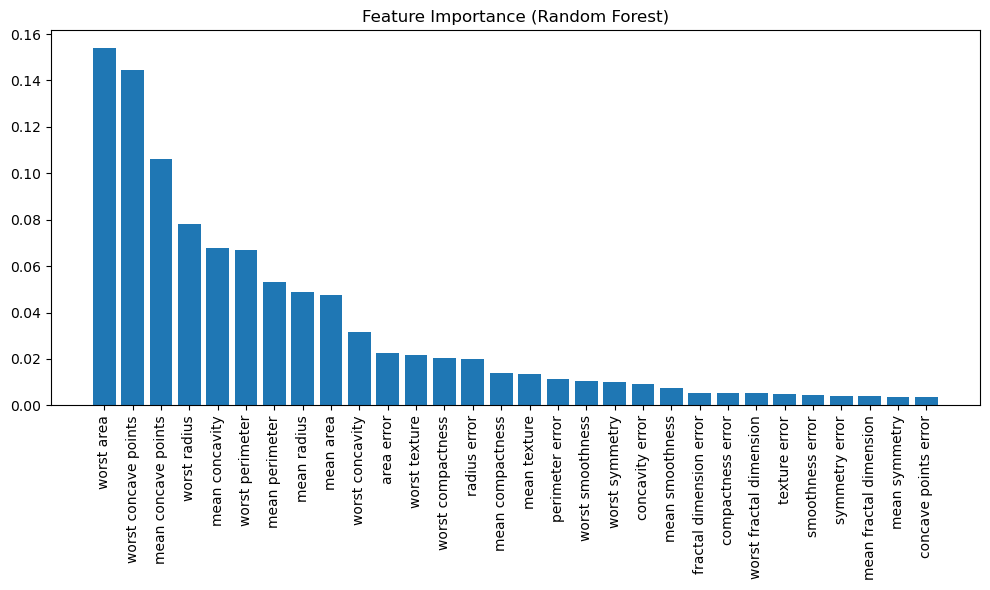

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Get importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10,6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


In [39]:
from sklearn.svm import SVC

# Initialize SVM with probability estimates for ROC AUC
svm = SVC(kernel='rbf', probability=True, random_state=42)

# Fit
svm.fit(X_train, y_train)

# Predict
y_pred_svm = svm.predict(X_test)
y_pred_prob_svm = svm.predict_proba(X_test)[:,1]

# Evaluate
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_prob_svm):.4f}")


SVM Accuracy: 0.9474
Precision: 0.9221
Recall: 1.0000
ROC AUC: 0.9934


In [40]:
from sklearn.tree import DecisionTreeClassifier

# Initialize
dt = DecisionTreeClassifier(random_state=42)

# Fit
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)
y_pred_prob_dt = dt.predict_proba(X_test)[:,1]

# Evaluate
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_prob_dt):.4f}")


Decision Tree Accuracy: 0.9474
Precision: 0.9577
Recall: 0.9577
ROC AUC: 0.9440


In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize
knn = KNeighborsClassifier(n_neighbors=5)

# Fit
knn.fit(X_train, y_train)

# Predict
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:,1]

# Evaluate
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_prob_knn):.4f}")


KNN Accuracy: 0.9561
Precision: 0.9342
Recall: 1.0000
ROC AUC: 0.9959


In [42]:
from sklearn.cluster import KMeans

# Initialize
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit
kmeans.fit(X_train)

# Get cluster assignments
clusters = kmeans.predict(X_test)

# Evaluate by comparing clusters with true labels
from sklearn.metrics import adjusted_rand_score
print(f"KMeans Adjusted Rand Index (clustering match): {adjusted_rand_score(y_test, clusters):.4f}")


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans Adjusted Rand Index (clustering match): 0.5599


In [43]:
from sklearn.naive_bayes import GaussianNB

# Initialize
nb = GaussianNB()

# Fit
nb.fit(X_train, y_train)

# Predict
y_pred_nb = nb.predict(X_test)
y_pred_prob_nb = nb.predict_proba(X_test)[:,1]

# Evaluate
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_prob_nb):.4f}")


Naive Bayes Accuracy: 0.9737
Precision: 0.9595
Recall: 1.0000
ROC AUC: 0.9984


In [54]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Fit PCA on training data
pca = PCA(n_components=5)  # or choose n_components to retain ~95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)  # or degree=3, etc.
X_train_poly = poly.fit_transform(X_train_pca)
X_test_poly = poly.transform(X_test_pca)

# Fit model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict
y_pred = model.predict(X_test_poly)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")


Mean Squared Error: 0.0625
R² Score: 0.7340


In [56]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Fit PCA (choose components based on variance explained or try 2 for quick start)
pca = PCA(n_components=5)  # Example: 5 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# (Optional: check explained variance)
print(pca.explained_variance_ratio_)
print(f"Total variance retained: {pca.explained_variance_ratio_.sum():.2f}")

# Train model
logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)

# Predict
y_pred = logreg.predict(X_test_pca)

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Detailed report
print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.4f}")


[9.81832642e-01 1.61366132e-02 1.80450637e-03 1.26776387e-04
 8.76917323e-05]
Total variance retained: 1.00
Accuracy: 0.9649
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

ROC AUC: 0.9581


In [59]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC  # or use LinearSVC if needed
from sklearn.metrics import accuracy_score, classification_report

# Initialize PCA - choose number of components (e.g. retain 95% variance or pick a number like 2 or 5)
pca = PCA(n_components=5)  # Example: reduce to 5 principal components

# Fit PCA on training data
X_train_pca = pca.fit_transform(X_train)

# Transform test data
X_test_pca = pca.transform(X_test)

# (Optional: Check variance retained)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print(f"Total variance retained: {pca.explained_variance_ratio_.sum():.2f}")

# Initialize and fit SVM
svm_model = SVC(kernel='rbf')  # or kernel='linear', 'poly', etc.
svm_model.fit(X_train_pca, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test_pca)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.4f}")


Explained variance ratio: [9.81832642e-01 1.61366132e-02 1.80450637e-03 1.26776387e-04
 8.76917323e-05]
Total variance retained: 1.00
Accuracy: 0.9474
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

ROC AUC: 0.9302


In [60]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Fit PCA
pca = PCA(n_components=5)  # Example: reduce to 5 principal components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Optional: check variance retained
print("Explained variance ratio:", pca.explained_variance_ratio_)
print(f"Total variance retained: {pca.explained_variance_ratio_.sum():.2f}")

# Initialize KNN (let's say k=5 neighbors)
knn = KNeighborsClassifier(n_neighbors=5)

# Train
knn.fit(X_train_pca, y_train)

# Predict
y_pred = knn.predict(X_test_pca)

# Accuracy & report
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.4f}")


Explained variance ratio: [9.81832642e-01 1.61366132e-02 1.80450637e-03 1.26776387e-04
 8.76917323e-05]
Total variance retained: 1.00
Accuracy: 0.9561
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

ROC AUC: 0.9419


Explained variance ratio: [0.98183264 0.01613661]
Total variance retained: 1.00


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score: 0.7036


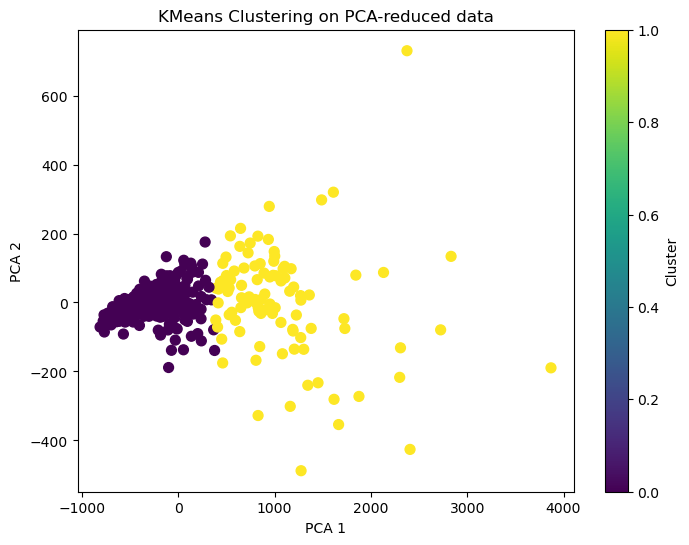

In [61]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Initialize PCA
pca = PCA(n_components=2)  # We often use 2 for visualization, or higher for clustering

# Fit and transform
X_train_pca = pca.fit_transform(X_train)

# Check variance retained
print("Explained variance ratio:", pca.explained_variance_ratio_)
print(f"Total variance retained: {pca.explained_variance_ratio_.sum():.2f}")

# Initialize KMeans
kmeans = KMeans(n_clusters=2, random_state=42)  # Set n_clusters as per your dataset

# Fit on PCA-reduced data
kmeans.fit(X_train_pca)

# Get cluster labels
labels = kmeans.labels_

score = silhouette_score(X_train_pca, labels)
print(f"Silhouette Score: {score:.4f}")

plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title("KMeans Clustering on PCA-reduced data")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()


In [62]:
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize PCA
pca = PCA(n_components=5)  # You can choose based on variance retained

# Fit and transform
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Optional: check variance retained
print("Explained variance ratio:", pca.explained_variance_ratio_)
print(f"Total variance retained: {pca.explained_variance_ratio_.sum():.2f}")

# Initialize NBC
nbc = GaussianNB()

# Fit the model
nbc.fit(X_train_pca, y_train)

# Predict
y_pred = nbc.predict(X_test_pca)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


Explained variance ratio: [9.81832642e-01 1.61366132e-02 1.80450637e-03 1.26776387e-04
 8.76917323e-05]
Total variance retained: 1.00
Accuracy: 0.9386
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        43
           1       0.92      0.99      0.95        71

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



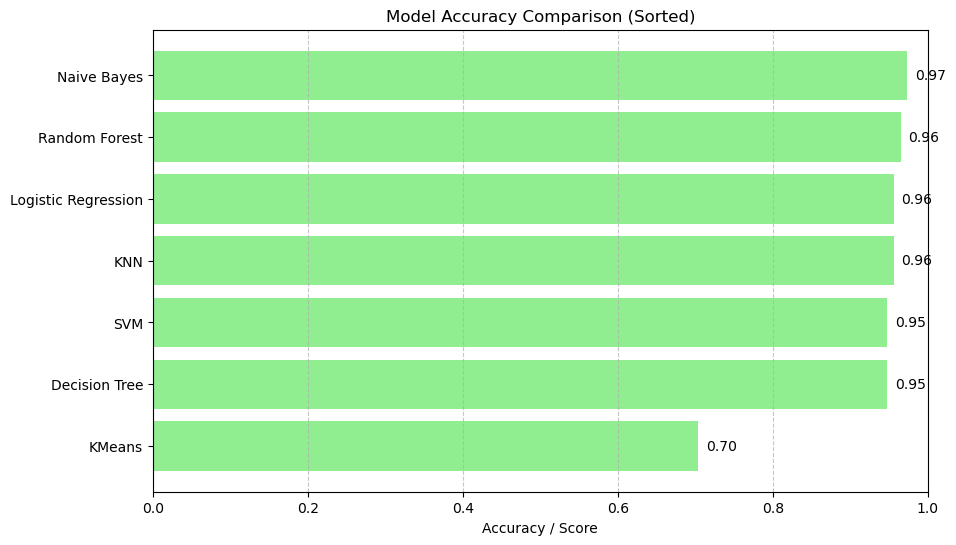

In [66]:
results = {
    "Logistic Regression": 0.9561,
    "Random Forest": 0.9649,
    "SVM": 0.9474,
    "Decision Tree": 0.9474,
    "KNN": 0.9561,
    "Naive Bayes": 0.9737,
    "KMeans": 0.7036,               # Silhouette score or clustering accuracy (if compared to labels)
}

import matplotlib.pyplot as plt

# Sort the results by accuracy (descending)
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))

# Extract model names and accuracies
model_names = list(sorted_results.keys())
accuracies = list(sorted_results.values())

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(model_names, accuracies, color='lightgreen')
plt.xlabel('Accuracy / Score')
plt.title('Model Accuracy Comparison (Sorted)')

# Annotate bars with accuracy values
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center')

plt.xlim(0, 1.0)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # So highest accuracy is at the top
plt.show()



In [67]:
pip install ipywidgets


Note: you may need to restart the kernel to use updated packages.


In [68]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Example: assume your model is called `nbc` and trained on 4 features
# Adjust names and ranges according to your dataset

# Create input widgets (e.g., for 4 features)
feature1 = widgets.FloatText(description='Feature 1:')
feature2 = widgets.FloatText(description='Feature 2:')
feature3 = widgets.FloatText(description='Feature 3:')
feature4 = widgets.FloatText(description='Feature 4:')

# Button
predict_button = widgets.Button(description='Predict')

# Output area
output = widgets.Output()

# Prediction function
def on_button_click(b):
    with output:
        output.clear_output()
        # Get inputs as a numpy array
        user_input = np.array([[feature1.value, feature2.value, feature3.value, feature4.value]])
        
        # You can apply PCA transform here if using PCA
        # user_input_pca = pca.transform(user_input)
        
        # Make prediction
        pred = nbc.predict(user_input)
        print(f"Predicted class: {pred[0]}")

# Attach the function to the button
predict_button.on_click(on_button_click)

# Display widgets
display(feature1, feature2, feature3, feature4, predict_button, output)


FloatText(value=0.0, description='Feature 1:')

FloatText(value=0.0, description='Feature 2:')

FloatText(value=0.0, description='Feature 3:')

FloatText(value=0.0, description='Feature 4:')

Button(description='Predict', style=ButtonStyle())

Output()